In [119]:
from lyricsgenius import Genius
import altair as alt
import json
import re
from requests.exceptions import Timeout
import requests
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud 
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [120]:
token = 'TrcjrowEH-Hiqe9y2_hxBBIphZpGAqHQItB5vrd3EC6452muK91yLmJXHAvJ0a4A'

In [121]:
genius = Genius(token)

# Getting data

In [122]:
%%time
artist = 'Pitbull'
songs_num = 25

def get_lyrics():
    genius = Genius(token)
    genius.timeout = 15
    genius.sleep_time = 5  # 2
    retries = 0
    while retries < 3:
        try:
            result = genius.search_artist(artist, max_songs=songs_num, sort="popularity")
            result.save_lyrics(filename='lyrics', overwrite=True)
            break
        except Timeout as e:
            retries += 1
            continue

get_lyrics()

Searching for songs by Pitbull...

Song 1: "Feel This Moment"
Song 2: "Timber"
Song 3: "Give Me Everything"
Song 4: "Hotel Room Service"
Song 5: "Options"
Song 6: "International Love"
Song 7: "We Are One (Ole Ola)"
Song 8: "Fireball"
Song 9: "I Know You Want Me (Calle Ocho)"
Song 10: "Rain Over Me"
Song 11: "El Taxi"
Song 12: "Culo"
Song 13: "Fun"
Song 14: "Hey Baby (Drop It to the Floor)"
Song 15: "Greenlight"
Song 16: "Don’t Stop the Party"
Song 17: "Back in Time"
Song 18: "Mr. Worldwide (Intro)"
Song 19: "Mentirosa"
Song 20: "Ocean To Ocean"
Song 21: "Watagatapitusberry (Remix)"
Song 22: "Hold Up Wait A Minute"
Song 23: "Welcome To Dade County (Lil Wayne Diss)"
Song 24: "Go Girl"
Song 25: "The Anthem"

Reached user-specified song limit (25).
Done. Found 25 songs.
Wrote lyrics.json.
CPU times: total: 10.5 s
Wall time: 11min 53s


In [ ]:
with open('lyrics.json') as f:
    data = json.load(f)
for song in data['songs']:
    print(song['title'])
    print(song['lyrics'][-100:-20])
    print('\n')

In [ ]:
result = genius.search_artist("Pitbull", max_songs=3, sort="popularity")

In [29]:
for song in result.songs:
    print(song.title)
    print(song.lyrics[120:130])
    print('\n')

Feel This Moment
get money 


Timber
u better d


Give Me Everything
at with a 




In [4]:
from pathlib import Path

In [ ]:
def download_lyrics(artist, number):

    # download lyrics
    result = genius.search_artist("Pitbull", max_songs=number, sort="popularity")
    
    for song in result.songs:

            #If the song is not empty
            if song != None:
                
                #Establish the filename for each song inside a directory that begins with the artist's name and album title
                custom_filename=f"{artist}/{song.title}"
                
                #A line of code that we need to create a directory
                 #os.makedirs(os.path.dirname(filename), exist_ok=True)
                Path(f"{artist}".mkdir(parents=True, exist_ok=True)
                
                #Save the lyrics for the song as a text file
                song.save_lyrics(filename=custom_filename, extension='txt', sanitize=False)
            
            #If the song doesn't contain lyrics
            else:
                print('No lyrics')

# Analysis

## 1. Preparing for tokenization

In [123]:
songs_titles = []
whole_lyrics = []

In [124]:
with open('lyrics.json') as f:
    data = json.load(f)
for song in data['songs']:
    songs_titles.append(song['title'])
    whole_lyrics.append(song['lyrics'])

In [125]:
len(whole_lyrics[1])

3174

In [126]:
def preprocess_lyrics(lyrics):
    lyrics= re.sub(r'\d+Embed$', '', lyrics)
    lyrics=re.sub(r'^.*?\n', '', lyrics, flags=re.DOTALL)
    lyrics=re.sub(r'\[.+?\]', '', lyrics)
    return lyrics

In [70]:
print(preprocess_lyrics(example))

Me not workin' hard? Yeah right
Picture that with a Kodak
Or, better yet, go to Times Square
Take a picture of me with a Kodak
Took my life from negative to positive
I just want y'all to know that
And tonight, let's enjoy life
Pitbull, Nayer, Ne-Yo, tell us right


Tonight, I want all of you tonight
Give me everything tonight
For all we know
We might not get tomorrow, let's do it tonight
Don't care what they say, or what games they play
Nothing is enough, 'til they handle love (Let's do it tonight)
I want you tonight, I want you to stay, I want you tonight


Grab somebody sexy, tell 'em hey (Hey)
Give me everything tonight (Hey)
Give me everything tonight (Hey)
Give me everything tonight (Hey)
Give me everything tonight
You might also like
Take advantage of tonight (Yeah)
'Cause tomorrow I'm off to Dubai to perform for a princess
But tonight, I can make you my queen
And make love to you endless (Yeah)
This is insane: the way the name growin'
Money keep flowin', hustlers move in silence

In [73]:
example2 = preprocess_lyrics(example)

In [89]:
example2

"Me not workin' hard? Yeah right\nPicture that with a Kodak\nOr, better yet, go to Times Square\nTake a picture of me with a Kodak\nTook my life from negative to positive\nI just want y'all to know that\nAnd tonight, let's enjoy life\nPitbull, Nayer, Ne-Yo, tell us right\n\n\nTonight, I want all of you tonight\nGive me everything tonight\nFor all we know\nWe might not get tomorrow, let's do it tonight\nDon't care what they say, or what games they play\nNothing is enough, 'til they handle love (Let's do it tonight)\nI want you tonight, I want you to stay, I want you tonight\n\n\nGrab somebody sexy, tell 'em hey (Hey)\nGive me everything tonight (Hey)\nGive me everything tonight (Hey)\nGive me everything tonight (Hey)\nGive me everything tonight\nYou might also like\nTake advantage of tonight (Yeah)\n'Cause tomorrow I'm off to Dubai to perform for a princess\nBut tonight, I can make you my queen\nAnd make love to you endless (Yeah)\nThis is insane: the way the name growin'\nMoney keep fl

In [127]:
whole_lyrics_pp = []

for song in whole_lyrics:
    song_pp = preprocess_lyrics(song)
    whole_lyrics_pp.append(song_pp)

## 2. Tokenization

In [43]:
def split_into_words(any_chunk_of_text):
    lowercase_text = any_chunk_of_text.lower()
    split_words = re.split("\W+", lowercase_text)
    return split_words 

In [81]:
print(split_into_words(example2)[:100])

['me', 'not', 'workin', 'hard', 'yeah', 'right', 'picture', 'that', 'with', 'a', 'kodak', 'or', 'better', 'yet', 'go', 'to', 'times', 'square', 'take', 'a', 'picture', 'of', 'me', 'with', 'a', 'kodak', 'took', 'my', 'life', 'from', 'negative', 'to', 'positive', 'i', 'just', 'want', 'y', 'all', 'to', 'know', 'that', 'and', 'tonight', 'let', 's', 'enjoy', 'life', 'pitbull', 'nayer', 'ne', 'yo', 'tell', 'us', 'right', 'tonight', 'i', 'want', 'all', 'of', 'you', 'tonight', 'give', 'me', 'everything', 'tonight', 'for', 'all', 'we', 'know', 'we', 'might', 'not', 'get', 'tomorrow', 'let', 's', 'do', 'it', 'tonight', 'don', 't', 'care', 'what', 'they', 'say', 'or', 'what', 'games', 'they', 'play', 'nothing', 'is', 'enough', 'til', 'they', 'handle', 'love', 'let', 's', 'do']


In [87]:
example3 = split_into_words(example2)

## 3. Removing stopwords, lemmatization

In [82]:
from nltk.corpus import stopwords

In [83]:
stopwords_english = stopwords.words('english') 

In [88]:
print([x for x in example3[:100] if x not in stopwords_english])

['workin', 'hard', 'yeah', 'right', 'picture', 'kodak', 'better', 'yet', 'go', 'times', 'square', 'take', 'picture', 'kodak', 'took', 'life', 'negative', 'positive', 'want', 'know', 'tonight', 'let', 'enjoy', 'life', 'pitbull', 'nayer', 'ne', 'yo', 'tell', 'us', 'right', 'tonight', 'want', 'tonight', 'give', 'everything', 'tonight', 'know', 'might', 'get', 'tomorrow', 'let', 'tonight', 'care', 'say', 'games', 'play', 'nothing', 'enough', 'til', 'handle', 'love', 'let']


## 4. Vectorization and TF-IDF

In [128]:
from sklearn.feature_extraction.text import CountVectorizer

In [129]:
vectorizer = CountVectorizer()

In [112]:
vectorizer2 = CountVectorizer(min_df=2)

In [134]:
X = vectorizer.fit_transform(whole_lyrics_pp)

In [113]:
X2 = vectorizer2.fit_transform(whole_lyrics_pp)

In [135]:
X

<25x1667 sparse matrix of type '<class 'numpy.int64'>'
	with 3767 stored elements in Compressed Sparse Row format>

In [ ]:
vectorizer.transform(['I love you baby.']).toarray()

In [117]:
example2

"Me not workin' hard? Yeah right\nPicture that with a Kodak\nOr, better yet, go to Times Square\nTake a picture of me with a Kodak\nTook my life from negative to positive\nI just want y'all to know that\nAnd tonight, let's enjoy life\nPitbull, Nayer, Ne-Yo, tell us right\n\n\nTonight, I want all of you tonight\nGive me everything tonight\nFor all we know\nWe might not get tomorrow, let's do it tonight\nDon't care what they say, or what games they play\nNothing is enough, 'til they handle love (Let's do it tonight)\nI want you tonight, I want you to stay, I want you tonight\n\n\nGrab somebody sexy, tell 'em hey (Hey)\nGive me everything tonight (Hey)\nGive me everything tonight (Hey)\nGive me everything tonight (Hey)\nGive me everything tonight\nYou might also like\nTake advantage of tonight (Yeah)\n'Cause tomorrow I'm off to Dubai to perform for a princess\nBut tonight, I can make you my queen\nAnd make love to you endless (Yeah)\nThis is insane: the way the name growin'\nMoney keep fl

In [ ]:
example3 = vectorizer.transform(example2).toarray()
example3

In [115]:
from sklearn.feature_extraction.text import TfidfTransformer

In [116]:
transformer = TfidfTransformer()

In [146]:
X_tfidf = transformer.fit_transform(X)

In [147]:
transformer.transform(vectorizer.transform(['I love you baby.']).toarray())

<1x1667 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [232]:
vectorizer.get_feature_names_out()

array(['000', '15', '15th', ..., 'zow', 'zulema', 'éxitos'], dtype=object)

In [231]:
tfidf_df = pd.DataFrame(X_tfidf.toarray(), index=songs_titles, columns=vectorizer.get_feature_names_out())

In [239]:
tfidf_df.head()

,000,15,15th,1st,200,212,30,305,310,500,...,your,yours,yuh,yuli,zig,zoes,zoom,zow,zulema,éxitos
Feel This Moment,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.030439,0.0,0.0,0.000000,0.0
Timber,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.020148,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
Give Me Everything,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.007875,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
Hotel Room Service,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.106754,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.017391,0.0
Options,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.117061,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0


In [244]:
tfidf_df = tfidf_df.stack().reset_index()
tfidf_df = tfidf_df.rename(columns={0:'tfidf', 'level_0': 'document','level_1': 'term', 'level_2': 'term'})

In [245]:
tfidf_df.head()

,document,term,tfidf
0,Feel This Moment,000,0.0
1,Feel This Moment,15,0.0
2,Feel This Moment,15th,0.0
3,Feel This Moment,1st,0.0
4,Feel This Moment,200,0.0


In [253]:
top_tfidf = tfidf_df.sort_values(by=['document','tfidf'], ascending=[True,False]).groupby(['document']).head(1)
top_tfidf

,document,term,tfidf
26752,Back in Time,baby,0.523304
19823,Culo,tremendo,0.465369
26649,Don’t Stop the Party,yeah,0.417310
16916,El Taxi,cho,0.555777
923,Feel This Moment,moment,0.578349
11849,Fireball,bringin,0.457163
20846,Fun,loosen,0.420750
4806,Give Me Everything,tonight,0.724239
38904,Go Girl,girl,0.484392
24356,Greenlight,oh,0.567840


In [252]:
top_tfidf[top_tfidf['term'].str.contains('baby')]

,document,term,tfidf
26752,Back in Time,baby,0.523304
11749,Fireball,baby,0.238653
21751,Hey Baby (Drop It to the Floor),baby,0.299576
6748,Options,baby,0.196759


### Similarities

In [ ]:
cosine_sim_matrix = cosine_similarity(X_tfidf, X_tfidf)
cosine_sim_matrix

In [264]:
cosine_sim_df = pd.DataFrame(cosine_sim_matrix)
cosine_sim_df.columns = songs_titles
cosine_sim_df.index = songs_titles
cosine_sim_df.head()

,Feel This Moment,Timber,Give Me Everything,Hotel Room Service,Options,International Love,We Are One (Ole Ola),Fireball,I Know You Want Me (Calle Ocho),Rain Over Me,...,Don’t Stop the Party,Back in Time,Mr. Worldwide (Intro),Mentirosa,Ocean To Ocean,Watagatapitusberry (Remix),Hold Up Wait A Minute,Welcome To Dade County (Lil Wayne Diss),Go Girl,The Anthem
Feel This Moment,1.000000,0.309428,0.088802,0.120711,0.121126,0.346416,0.049144,0.071793,0.045202,0.109151,...,0.117761,0.190998,0.091987,0.119224,0.102756,0.082783,0.054176,0.074815,0.099816,0.035440
Timber,0.309428,1.000000,0.045841,0.156422,0.103831,0.505673,0.035775,0.057304,0.037491,0.173191,...,0.060409,0.209701,0.045526,0.037309,0.063920,0.091821,0.034037,0.026974,0.055983,0.026877
Give Me Everything,0.088802,0.045841,1.000000,0.094695,0.189805,0.096685,0.079409,0.098827,0.186512,0.076213,...,0.125941,0.175383,0.122739,0.053836,0.142813,0.083964,0.069437,0.059038,0.124439,0.058077
Hotel Room Service,0.120711,0.156422,0.094695,1.000000,0.158634,0.159290,0.059302,0.098814,0.092173,0.327273,...,0.093772,0.117323,0.086777,0.056021,0.125237,0.060623,0.055670,0.043595,0.133460,0.083008
Options,0.121126,0.103831,0.189805,0.158634,1.000000,0.172343,0.132825,0.151827,0.158750,0.086230,...,0.220259,0.309910,0.207236,0.122584,0.297928,0.056195,0.134151,0.097264,0.258332,0.074937


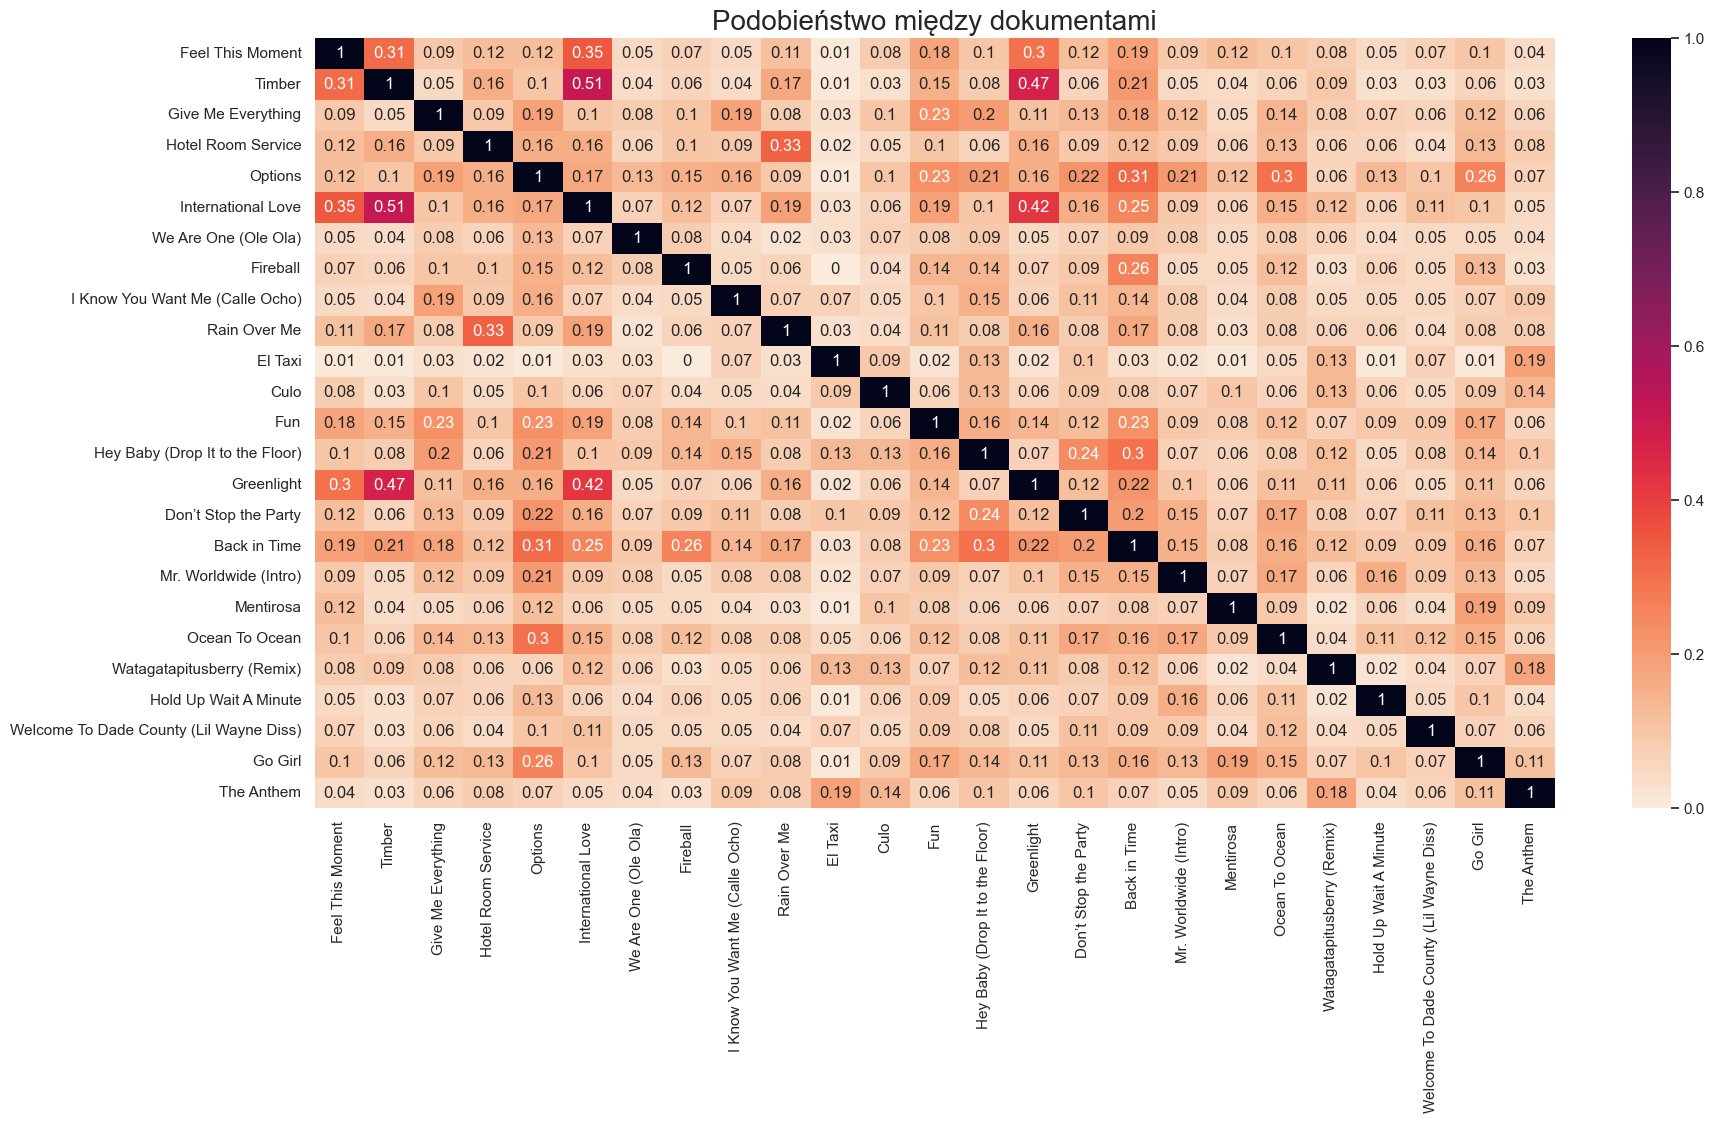

In [263]:
cmap = sns.cm.rocket_r
sns.set(font_scale=1)
plt.figure(figsize=(20,10))
ax = sns.heatmap(cosine_sim_df.round(decimals=2), annot=True, cmap = cmap, vmin=0, vmax=1)
plt.title('Podobieństwo między dokumentami', fontsize = 20)
plt.show()

<Axes: >

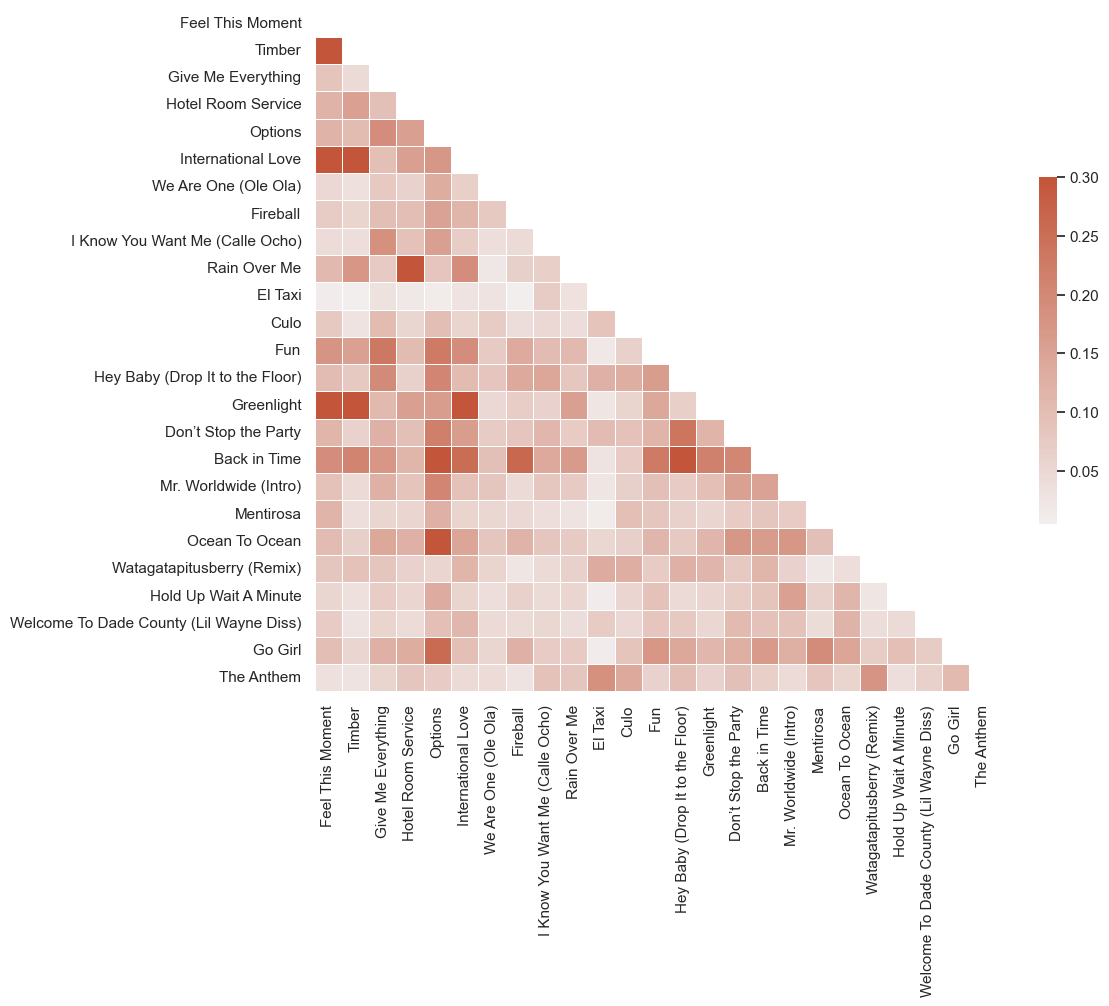

In [267]:
sns.set_theme(style="white")

# # Generate a large random dataset
# rs = np.random.RandomState(33)
# d = pd.DataFrame(data=rs.normal(size=(100, 26)),
#                  columns=list(ascii_letters[26:]))

# Compute the correlation matrix
# corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(cosine_sim_matrix))
               #, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cosine_sim_df, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## 5. Clustering

In [148]:
from sklearn.cluster import KMeans

Find by GridSearch best set of hyperparameters

In [210]:
kmeans = KMeans(
    n_clusters=5,
    max_iter=100,
    n_init=5
)

In [211]:
preds= kmeans.fit_predict(X_tfidf)
preds

array([3, 3, 1, 3, 1, 3, 1, 1, 2, 3, 4, 4, 1, 2, 3, 2, 1, 2, 0, 2, 4, 1,
       2, 0, 4])

In [212]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3, 4]), array([2, 7, 6, 6, 4], dtype=int64))

In [214]:
for i in range(len(songs_2d)):
    print(preds[i], songs_titles[i])

3 Feel This Moment
3 Timber
1 Give Me Everything
3 Hotel Room Service
1 Options
3 International Love
1 We Are One (Ole Ola)
1 Fireball
2 I Know You Want Me (Calle Ocho)
3 Rain Over Me
4 El Taxi
4 Culo
1 Fun
2 Hey Baby (Drop It to the Floor)
3 Greenlight
2 Don’t Stop the Party
1 Back in Time
2 Mr. Worldwide (Intro)
0 Mentirosa
2 Ocean To Ocean
4 Watagatapitusberry (Remix)
1 Hold Up Wait A Minute
2 Welcome To Dade County (Lil Wayne Diss)
0 Go Girl
4 The Anthem


In [215]:
kmeans.cluster_centers_

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.0056354 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01333016, 0.        , 0.01011081, ..., 0.00444339, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.00289847,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00771913]])

In [216]:
original_space_centroids = kmeans.cluster_centers_

In [217]:
original_space_centroids.argsort()

array([[   0, 1054, 1053, ...,  573,  563, 1255],
       [   0, 1009, 1005, ..., 1412, 1655,   80],
       [1666,  779,  778, ..., 1572, 1412,  782],
       [   0,  997,  996, ..., 1412,   75, 1018],
       [   0, 1013, 1012, ...,  829, 1575,  422]], dtype=int64)

In [218]:
original_space_centroids.argsort()[:, ::-1]

array([[1255,  563,  573, ..., 1053, 1054,    0],
       [  80, 1655, 1412, ..., 1005, 1009,    0],
       [ 782, 1412, 1572, ...,  778,  779, 1666],
       [1018,   75, 1412, ...,  996,  997,    0],
       [ 422, 1575,  829, ..., 1012, 1013,    0]], dtype=int64)

In [219]:
order_centroids = original_space_centroids.argsort()[:, ::-1]

In [220]:
order_centroids

array([[1255,  563,  573, ..., 1053, 1054,    0],
       [  80, 1655, 1412, ..., 1005, 1009,    0],
       [ 782, 1412, 1572, ...,  778,  779, 1666],
       [1018,   75, 1412, ...,  996,  997,    0],
       [ 422, 1575,  829, ..., 1012, 1013,    0]], dtype=int64)

In [224]:
original_space_centroids[1][1412]

0.13677991164928596

In [225]:
terms = vectorizer.get_feature_names_out()

for i in range(5):
    print(f"Cluster {i}: ", end="")
    for ind in order_centroids[i, :10]:
        print(f"{terms[ind]}: {original_space_centroids[i][ind]:.4f} ", end="")
    print()

Cluster 0: shake: 0.4582 girl: 0.2540 go: 0.1730 them: 0.1446 but: 0.1363 friends: 0.1289 mentirosa: 0.1208 ho: 0.1057 just: 0.1013 you: 0.0999 
Cluster 1: baby: 0.1689 you: 0.1483 the: 0.1368 tonight: 0.1284 ole: 0.1107 it: 0.0928 re: 0.0859 we: 0.0780 bringin: 0.0653 my: 0.0616 
Cluster 2: la: 0.1657 the: 0.1303 want: 0.1137 you: 0.1123 they: 0.0961 me: 0.0892 to: 0.0889 dade: 0.0809 worldwide: 0.0787 yeah: 0.0779 
Cluster 3: oh: 0.4359 ay: 0.1835 the: 0.1055 moment: 0.0964 hotel: 0.0870 international: 0.0837 wee: 0.0801 you: 0.0753 me: 0.0729 light: 0.0707 
Cluster 4: el: 0.1807 watagatapitusberry: 0.1619 lo: 0.1462 hey: 0.1449 cho: 0.1389 que: 0.1317 tremendo: 0.1163 culo: 0.1054 loca: 0.0980 tiene: 0.0873 


### LSA

## 6. Topic extraction